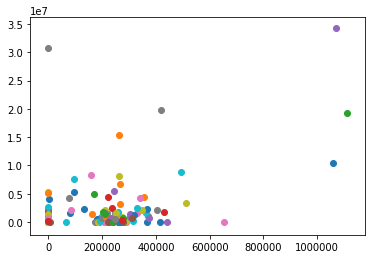

NameError: name 'KMeans' is not defined

In [8]:
""" 
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", \
         f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
# feature_3 = "total_payments" # inserindo o terceiro elemento
poi  = "poi"
features_list = [poi, feature_1, feature_2]
#features_list = [poi, feature_1, feature_2, feature_3] # inserindo o terceiro elemento
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
features_list = ["poi", feature_1, feature_2]
# features_list = ["poi", feature_1, feature_2,feature_3] # inserindo o terceiro elemento
data2 = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data2 )
clf = KMeans(n_clusters=2)
pred = clf.fit_predict( finance_features )
Draw(pred, finance_features, poi, name="clusters_before_scaling.pdf", \
     f1_name=feature_1, f2_name=feature_2)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", \
         f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"



In [9]:
# Ao pesquisar no dicionário de dados, qual é o valor máximo e o mínimo que 
# exercised_stock_options pode ter? (Ignore os valores NaN)

ex_stok = []
for users in data_dict:
    val = data_dict[users]["exercised_stock_options"]
    if val == 'NaN':
        continue
    ex_stok.append(val)
print max(ex_stok)
print min(ex_stok)
    

34348384
3285


In [10]:
# Quais são os valores máximos e mínimos tomadas pela variável salary?

salary = []
for users in data_dict:
    val = data_dict[users]["salary"]
    if val == 'NaN':
        continue
    salary.append(val)
    
print max(salary)
print min(salary)

1111258
477


In [ ]:
# A partir daqui
# Mini projeto da aula 10: escalonamento de características

In [11]:
salary = []
ex_stok = []
for users in data_dict:
    val = data_dict[users]["salary"]
    if val == 'NaN':
        continue
    salary.append(float(val))
    val = data_dict[users]["exercised_stock_options"]
    if val == 'NaN':
        continue
    ex_stok.append(float(val))

In [12]:
salary = [min(salary),200000.0,max(salary)]
ex_stok = [min(ex_stok),1000000.0,max(ex_stok)]

In [13]:
print salary
print ex_stok

[477.0, 200000.0, 1111258.0]
[17378.0, 1000000.0, 34348384.0]


In [14]:
salary = numpy.array([[e] for e in salary])
ex_stok = numpy.array([[e] for e in ex_stok])

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler_salary = MinMaxScaler()
scaler_stok = MinMaxScaler()

In [16]:
rescaled_salary = scaler_salary.fit_transform(salary)
rescaled_stock = scaler_stok.fit_transform(ex_stok)

In [17]:
print rescaled_salary
print rescaled_stock

[[0.        ]
 [0.17962407]
 [1.        ]]
[[0.      ]
 [0.028622]
 [1.      ]]


In [19]:
# só aceitou no quiz depois do arredondamento